In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning and Exploration

In [2]:
## read in the csv file and display the first 10 records
pokemon_df = pd.read_csv('pokemon.csv')
pokemon_df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


#### Let's look for missing values. It looks like the NaN values appear for those pokemon that only have one type which is unsurprising.

In [3]:
## Sum of all NaN values per column
pokemon_df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [4]:
## Display the records with Type 2 as NaN
pokemon_df[pokemon_df['Type 2'].isnull()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


#### Let's deal with the missing values.

In [5]:
## All the indices of the pokemon with Type 2 as NaN
one_type_idx = pokemon_df.loc[pd.isna(pokemon_df['Type 2']), :].index.tolist()
## Replace all NaN values
pokemon_df['Type 2'].fillna(value='None',inplace=True)
## Sanity check to verify the NaN values were replaced properly
pokemon_df.iloc[one_type_idx, :]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,None,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,None,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,None,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,None,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,None,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,None,514,95,117,184,44,46,28,6,False


#### Now we have dealt with missing values and done a check for sanity. Let's look at the legendary vs non-legendary pokemon.

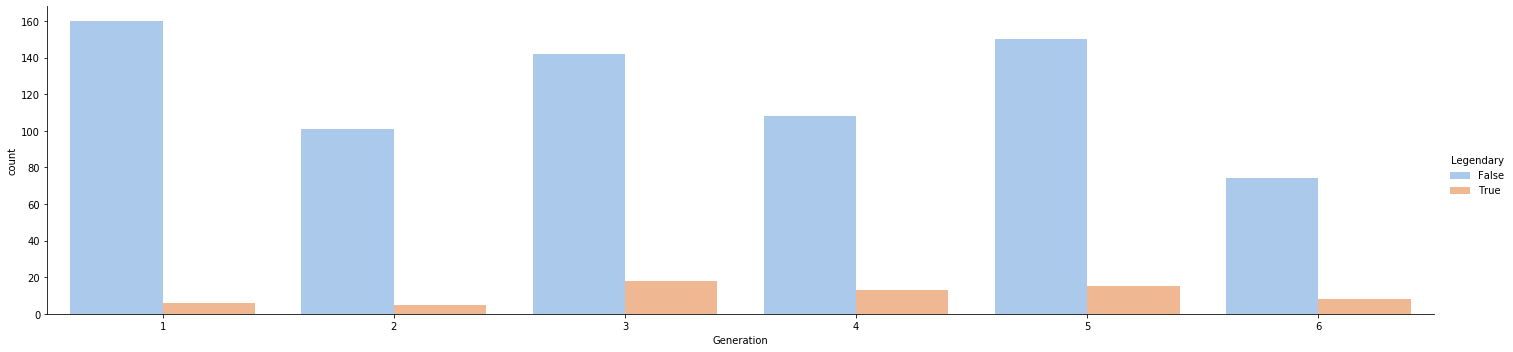

In [6]:
## Plot colour
sns.set_palette('pastel')
## Countplot of legendary vs. non-legendary for each generation
sns.factorplot('Generation', data=pokemon_df, aspect=4.0, kind='count', hue='Legendary')

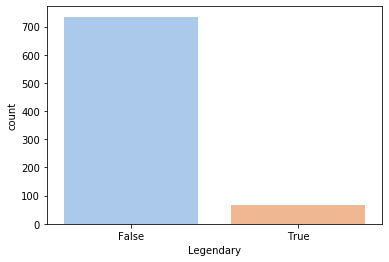

In [7]:
## Countplot of all legendary vs. non-legendary pokemon
sns.countplot(x='Legendary', data=pokemon_df)

#### It's clear to see that there is an imbalance in legendary vs non-legendary pokemon. This will hinder the performance of our classifier in an issue known as overfitting because the class of interest, legendary pokemon, is in the minority and will be more sensitive to classification errors.

# Data Preprocessing

In [8]:
## Remove fields irrelevant to learning process
pokemon_df.drop(['#', 'Name', 'Generation'], axis=1, inplace=True)

In [9]:
## One-hot encoding
x = pd.get_dummies(pokemon_df)
## Make Legendary column the training label and drop it from the training data
x.drop('Legendary', axis=1, inplace=True)
y = pokemon_df['Legendary']

#### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.30)

#### Oversampling using SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
## Increase the legendary [minority] class in the training set using synthetic minority oversampling
smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_sample(X_train, y_train)

In [12]:
## Number of records classified as legendary and non-legendary after using SMOTE
np.bincount(y_train)

array([510, 510])

# Train the Model with Random Search

In [13]:
## Hyperparameter tuning for n_estimators, max_features, max_depth
model_params = {'n_estimators': [int(x) for x in np.linspace(10,100, num=10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 100, num=10)],
            }

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
## Instantiate random forest classifier model
rf_model = RandomForestClassifier()
## Training the random forest classifier
clf = RandomizedSearchCV(rf_model, model_params, n_iter=50, cv=3, random_state=42)
model = clf.fit(X_train, y_train)

# Prediction on the Test Set

In [15]:
from sklearn.metrics import accuracy_score
y_pred =  model.predict(X_test)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=model.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.95
